In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
import numpy as np

In [36]:
# https://data.world/cdc/2015-drug-overdose-deaths
df1 = pd.read_csv('2015-death-data.csv', index_col=0)

In [37]:
df1.head()

,Range,Rate,Number,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
State,,,,,,,
AL,13.6 to 16.0,15.7,736,NaN,NaN,NaN,NaN
AK,13.6 to 16.0,16.0,122,NaN,NaN,NaN,NaN
AZ,18.6 to 21.0,19.0,"1,274",NaN,NaN,NaN,NaN
AR,13.6 to 16.0,13.8,392,NaN,NaN,NaN,NaN
CA,11.1 to 13.5,11.3,"4,659",NaN,NaN,NaN,NaN


In [38]:
df1.tail()

# Rate variable is how many deaths per 100,000 people. 

,Range,Rate,Number,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
State,,,,,,,
WA,13.6 to 16.0,14.7,"1,094",NaN,NaN,NaN,NaN
WV,21.0 to 41.5,41.5,725,NaN,NaN,NaN,NaN
WI,13.6 to 16.0,15.5,878,NaN,NaN,NaN,NaN
WY,16.1 to 18.5,16.4,96,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Get rid of the empty columns

columns = ['Range', 'Rate', 'Number']
df1 = pd.DataFrame(df1, columns=columns)

In [40]:
df1.head()

,Range,Rate,Number
State,,,
AL,13.6 to 16.0,15.7,736
AK,13.6 to 16.0,16.0,122
AZ,18.6 to 21.0,19.0,"1,274"
AR,13.6 to 16.0,13.8,392
CA,11.1 to 13.5,11.3,"4,659"


In [41]:
df1.tail()

,Range,Rate,Number
State,,,
WA,13.6 to 16.0,14.7,"1,094"
WV,21.0 to 41.5,41.5,725
WI,13.6 to 16.0,15.5,878
WY,16.1 to 18.5,16.4,96
NaN,NaN,NaN,NaN


In [42]:
df1.dropna()

,Range,Rate,Number
State,,,
AL,13.6 to 16.0,15.7,736
AK,13.6 to 16.0,16.0,122
AZ,18.6 to 21.0,19.0,"1,274"
AR,13.6 to 16.0,13.8,392
CA,11.1 to 13.5,11.3,"4,659"
CO,13.6 to 16.0,15.4,869
CT,21.0 to 41.5,22.1,800
DE,21.0 to 41.5,22.0,198
DC,18.6 to 21.0,18.6,125


In [43]:
df1.shape

(52, 3)

In [44]:
df1 = df1.iloc[:-1 , :]

In [45]:
df1.tail()

,Range,Rate,Number
State,,,
VA,11.1 to 13.5,12.4,"1,039"
WA,13.6 to 16.0,14.7,"1,094"
WV,21.0 to 41.5,41.5,725
WI,13.6 to 16.0,15.5,878
WY,16.1 to 18.5,16.4,96


In [46]:
# https://data.world/associatedpress/opioid-prescriptions-2010-2015
# MME is Morphine Milligram Equivalents
# fips = federal identification code for each county
df2 = pd.read_csv('Opioid_prescription_amounts.csv', index_col=0)

In [47]:
df2.head()

,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
FIPS,,,,,,
2050,AK,BETHEL,NaN,NaN,NaN,NaN
2068,AK,DENALI,NaN,NaN,NaN,NaN
2013,AK,ALEUTIANS EAST,NaN,NaN,NaN,NaN
2016,AK,ALEUTIANS WEST,NaN,NaN,NaN,NaN
2240,AK,SOUTHEAST FAIRBANKS,NaN,NaN,NaN,NaN


In [48]:
# get rid of NAs
df_2 = df2.dropna()

In [49]:
df_2.sample(50)

,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
FIPS,,,,,,
24037,MD,SAINT MARYS,797.1,784.7,3.0,Stable
28065,MS,JEFFERSON DAVIS,891.4,902.6,3.0,Stable
42015,PA,BRADFORD,740.0,673.4,2.0,Stable
47101,TN,LEWIS,1425.8,1347.5,4.0,Stable
46009,SD,BON HOMME,266.8,0.6,1.0,Decreased
51690,VA,MARTINSVILLE CITY,5201.1,4086.9,4.0,Decreased
54041,WV,LEWIS,1251.3,604.8,2.0,Decreased
31055,NE,DOUGLAS,515.9,458.3,2.0,Decreased
19063,IA,EMMET,283.7,424.7,1.0,Increased


In [50]:
list(df_2)

['State',
 'County',
 'MME_PerCap_2010',
 'MME_PerCap_2015',
 'Quartile_2015',
 '2010-2015_Change']

In [51]:
df_2 = df_2[['State', 'MME_PerCap_2010','MME_PerCap_2015']]

In [52]:
df_2.shape

(2734, 3)

In [53]:
# build a for loop that goes through the data set and combines the counties into each state.
#
#
df_2_1 = df_2.groupby(['State'])['MME_PerCap_2010', 'MME_PerCap_2015'].apply(np.sum)

<ipython-input-53-48076caafc5b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2_1 = df_2.groupby(['State'])['MME_PerCap_2010', 'MME_PerCap_2015'].apply(np.sum)


In [69]:
df_2_1.head()

,MME_PerCap_2010,MME_PerCap_2015
State,,
AK,7400.0,6097.7
AL,61744.7,63231.0
AR,61462.1,59221.7
AZ,14909.2,13493.5
CA,59583.8,47343.8


In [56]:
df3 = pd.read_csv('opioid-prescriptions-dispensed-us-1991-2013.csv', index_col= 0)

In [57]:
df3.head()

,Prescriptions Dispensed (millions)
Year,
1991,76
1992,79
1993,82
1994,85
1995,87


In [58]:
list(df3)

['Prescriptions Dispensed (millions)']

In [59]:
df3.shape

(23, 1)

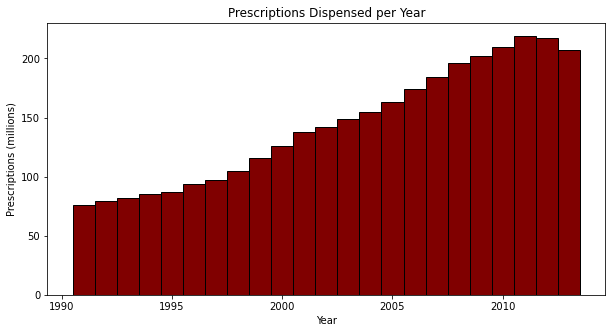

In [60]:
data = df3

prescriptions = df3["Prescriptions Dispensed (millions)"]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df3.index, prescriptions, color ='maroon',
        width = 1, edgecolor = "black")
 
plt.xlabel("Year")
plt.ylabel("Prescriptions (millions)")
plt.title("Prescriptions Dispensed per Year")
plt.show()

In [70]:


df4 = pd.read_excel('EducationReport.xlsx', index_col= 0)

In [71]:
df4.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Total,NaN,NaN,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,Rural,NaN,NaN,NaN,NaN,NaN
Name,1970,1980.000000,1990.000000,2000.000000,2015-2019,1970,1980.000000,1990.000000,2000.000000,2015-2019,NaN,1970,NaN,1980.000000,1990.000000,2000.000000,2015-2019
United States,0.106618,0.162296,0.203380,0.244016,0.321455,0.11542,0.174884,0.219667,0.262235,0.341864,NaN,0.0672646,NaN,0.104972,0.122836,0.149003,0.199979
Alabama,0.0784698,0.121797,0.156808,0.190347,0.254683,0.0888388,0.137495,0.178450,0.217080,0.285907,NaN,0.0529989,NaN,0.082044,0.097791,0.115997,0.154118


In [64]:
df4.dropna()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17


In [65]:
# https://data.world/rubyn/ses-demographics-arrests-analysis/workspace/data-dictionary
# 2017 data doesn't quite line up with the 2015 opiod data but it will work for the sake of exploratory analysis
# hypothesis: the rising rate of opiod prescriptions, education level, and state play a factor in opiod related death.

df5 = pd.read_excel('State - Income, Education Level by State.xlsx', index_col= 0)

In [66]:
df5.head()

,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_25km_of_state_counties,total_colleges_within_50km_of_state_counties,total_colleges_within_75km_of_state_counties,total_colleges_within_100km_of_state_counties
state,,,,,,,,
Alabama,Southeast,40271.402985,0.266510,0.2642,126,449,1042,1839
Alaska,West,66425.448276,0.820631,0.1705,0,0,0,0
Arizona,Southwest,45816.666667,0.423407,0.2270,11,47,107,202
Arkansas,Southeast,39025.080000,0.212615,0.1577,137,495,1121,1955
California,West,61046.758621,0.700403,0.1849,399,1379,2705,4292


In [ ]:
df5.shape

In [ ]:
df1.tail()

In [135]:
df1.shape

(52, 3)

In [67]:
df6 =pd.merge(df1, df5, on = df5.index)

In [68]:
df6.head()

,key_0,Range,Rate,Number,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_25km_of_state_counties,total_colleges_within_50km_of_state_counties,total_colleges_within_75km_of_state_counties,total_colleges_within_100km_of_state_counties
0,Alabama,13.6 to 16.0,15.7,736,Southeast,40271.402985,0.266510,0.2642,126,449,1042,1839
1,Alaska,13.6 to 16.0,16.0,122,West,66425.448276,0.820631,0.1705,0,0,0,0
2,Arizona,18.6 to 21.0,19.0,"1,274",Southwest,45816.666667,0.423407,0.2270,11,47,107,202
3,Arkansas,13.6 to 16.0,13.8,392,Southeast,39025.080000,0.212615,0.1577,137,495,1121,1955
4,California,11.1 to 13.5,11.3,"4,659",West,61046.758621,0.700403,0.1849,399,1379,2705,4292


In [ ]:

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [ ]:
# df7 = pd.merge(df6, df_2_1, on = df5.index)

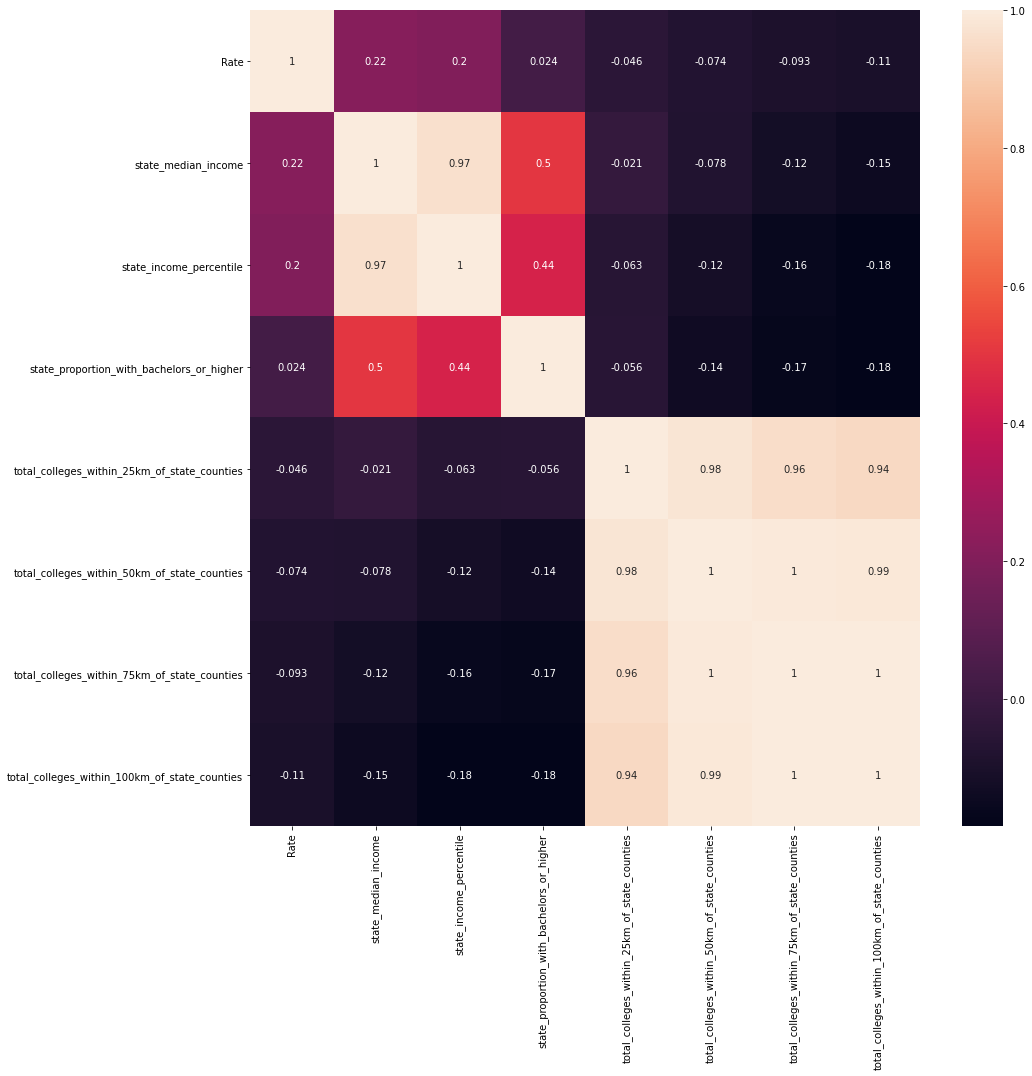

In [147]:
fig = plt.figure(figsize= (10,10))
sns.heatmap(df6.corr(), annot=True)
plt.show()

In [167]:
df6["Number"] = df6["Number"].str.replace(",","").astype(float)

AttributeError: Can only use .str accessor with string values!

In [168]:
df6.head()

,key_0,Range,Rate,Number,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_25km_of_state_counties,total_colleges_within_50km_of_state_counties,total_colleges_within_75km_of_state_counties,total_colleges_within_100km_of_state_counties
0,Alabama,13.6 to 16.0,15.7,736.0,Southeast,40271.402985,0.266510,0.2642,126,449,1042,1839
1,Alaska,13.6 to 16.0,16.0,122.0,West,66425.448276,0.820631,0.1705,0,0,0,0
2,Arizona,18.6 to 21.0,19.0,1274.0,Southwest,45816.666667,0.423407,0.2270,11,47,107,202
3,Arkansas,13.6 to 16.0,13.8,392.0,Southeast,39025.080000,0.212615,0.1577,137,495,1121,1955
4,California,11.1 to 13.5,11.3,4659.0,West,61046.758621,0.700403,0.1849,399,1379,2705,4292


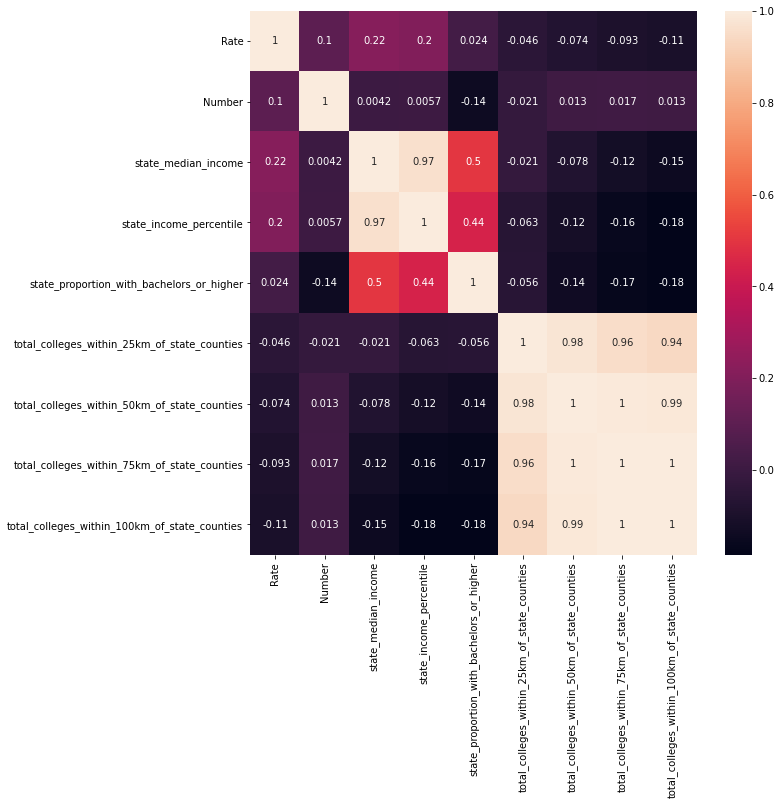

In [170]:
fig = plt.figure(figsize= (10,10))
sns.heatmap(df6.corr(), annot=True)
plt.show()

In [54]:
fentynal = pd.read_csv('NJRxFentanyl11-16.csv', index_col= 0)

In [45]:
fentynal.head()

,Abstral,Actiq,Duragesic,Fentanyl,Fentanyl Citrate,Fentora,Lazanda,Subsys,All Drug Total
Month Dispensed,,,,,,,,,
Sep-01-2011,9,39,487,"10,461",392,330,0,0,"11,718"
Oct-2011,4,38,470,"10,535",418,352,0,0,"11,817"
Nov-2011,5,49,521,"11,012",425,405,1,0,"12,418"
Dec-2011,4,40,571,"11,746",418,448,2,0,"13,229"
Jan-2012,2,36,553,"11,603",407,329,0,0,"12,930"


In [51]:
fentynal.tail()

,Abstral,Actiq,Duragesic,Fentanyl,Fentanyl Citrate,Fentora,Lazanda,Subsys,All Drug Total
Month Dispensed,,,,,,,,,
Oct-2016,1,11,281,"9,176",121,119,18,85,"9,812"
Nov-2016,4,14,281,"9,358",110,96,13,65,"9,941"
Dec-2016,4,10,268,"9,322",119,87,16,48,"9,874"
Jan-2017,5,11,241,"8,909",116,68,14,45,"9,409"
Feb-22-2017,3,5,145,"5,593",61,51,6,24,"5,888"


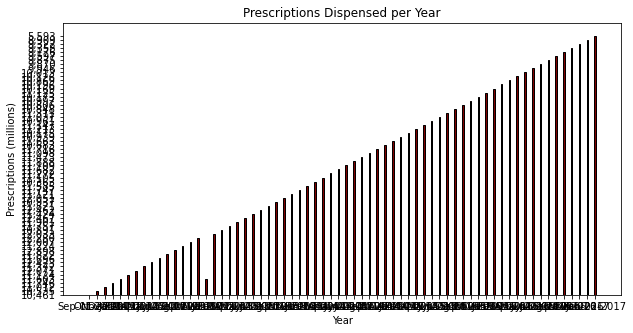

In [48]:
# change the data to a per year basis. combine the months 


fig = plt.figure(figsize = (10, 5))
 
fent = fentynal['Fentanyl']
# creating the bar plot
plt.bar(fentynal.index, fent, color ='maroon',
        width = .2, edgecolor = "black")
 
plt.xlabel("Year")
plt.ylabel("Prescriptions (millions)")
plt.title("Prescriptions Dispensed per Year")
plt.show()

In [55]:
fentynal2 = pd.read_csv('county-ods-16.csv', index_col= 0)

In [59]:
fentynal2.head()

,2012 Total,2013 Total,2014 Total,2015 Total,1/1-6/30 2016 Total,2004 Heroin*,2005 Heroin*,2006 Heroin*,2007 Heroin*,2008 Heroin*,...,2013 Heroin*,2014 Heroin,2015 Heroin,1/1-6/30 2016 Heroin,2012 Fentanyl,2013 Fentanyl,2014 Fentanyl,2015 Fentanyl,1/1-6/30 2016 Fentanyl,1/1-6/30 2016 Fentanyl Analogues**
COUNTY,,,,,,,,,,,,,,,,,,,,,
Atlantic,81.0,84.0,88.0,85.0,83.0,24.0,24.0,19.0,18.0,21.0,...,47.0,48.0,54.0,48.0,3.0,1.0,9.0,23.0,29.0,1.0
Bergen,75.0,91.0,81.0,85.0,51.0,23.0,21.0,19.0,24.0,16.0,...,36.0,42.0,51.0,30.0,6.0,5.0,8.0,24.0,14.0,2.0
Burlington,67.0,70.0,75.0,87.0,46.0,6.0,13.0,17.0,8.0,17.0,...,43.0,25.0,41.0,19.0,4.0,0.0,13.0,38.0,7.0,0.0
Camden,139.0,160.0,138.0,191.0,76.0,37.0,38.0,71.0,29.0,49.0,...,104.0,91.0,115.0,54.0,1.0,1.0,12.0,53.0,23.0,1.0
Cape May,24.0,30.0,24.0,32.0,17.0,3.0,13.0,12.0,6.0,12.0,...,17.0,14.0,18.0,7.0,0.0,8.0,4.0,10.0,5.0,1.0


In [80]:
fent = fentynal2.dropna()

In [81]:
fent

,2012 Total,2013 Total,2014 Total,2015 Total,1/1-6/30 2016 Total,2004 Heroin*,2005 Heroin*,2006 Heroin*,2007 Heroin*,2008 Heroin*,...,2013 Heroin*,2014 Heroin,2015 Heroin,1/1-6/30 2016 Heroin,2012 Fentanyl,2013 Fentanyl,2014 Fentanyl,2015 Fentanyl,1/1-6/30 2016 Fentanyl,1/1-6/30 2016 Fentanyl Analogues**
COUNTY,,,,,,,,,,,,,,,,,,,,,
Atlantic,81.0,84.0,88.0,85.0,83.0,24.0,24.0,19.0,18.0,21.0,...,47.0,48.0,54.0,48.0,3.0,1.0,9.0,23.0,29.0,1.0
Bergen,75.0,91.0,81.0,85.0,51.0,23.0,21.0,19.0,24.0,16.0,...,36.0,42.0,51.0,30.0,6.0,5.0,8.0,24.0,14.0,2.0
Burlington,67.0,70.0,75.0,87.0,46.0,6.0,13.0,17.0,8.0,17.0,...,43.0,25.0,41.0,19.0,4.0,0.0,13.0,38.0,7.0,0.0
Camden,139.0,160.0,138.0,191.0,76.0,37.0,38.0,71.0,29.0,49.0,...,104.0,91.0,115.0,54.0,1.0,1.0,12.0,53.0,23.0,1.0
Cape May,24.0,30.0,24.0,32.0,17.0,3.0,13.0,12.0,6.0,12.0,...,17.0,14.0,18.0,7.0,0.0,8.0,4.0,10.0,5.0,1.0
Cumberland,26.0,22.0,27.0,38.0,25.0,6.0,2.0,9.0,1.0,5.0,...,14.0,18.0,16.0,17.0,0.0,0.0,1.0,10.0,9.0,0.0
Essex,102.0,132.0,114.0,146.0,125.0,69.0,85.0,72.0,62.0,47.0,...,60.0,54.0,91.0,67.0,2.0,4.0,13.0,29.0,35.0,3.0
Gloucester,58.0,71.0,51.0,65.0,39.0,10.0,14.0,33.0,15.0,17.0,...,50.0,40.0,37.0,26.0,0.0,0.0,3.0,17.0,13.0,0.0
Hudson,73.0,77.0,64.0,107.0,58.0,26.0,35.0,27.0,26.0,24.0,...,31.0,32.0,64.0,38.0,2.0,4.0,6.0,18.0,13.0,0.0


In [85]:
fent.apply(pd.to_numeric, errors='ignore')

,2012 Total,2013 Total,2014 Total,2015 Total,1/1-6/30 2016 Total,2004 Heroin*,2005 Heroin*,2006 Heroin*,2007 Heroin*,2008 Heroin*,...,2013 Heroin*,2014 Heroin,2015 Heroin,1/1-6/30 2016 Heroin,2012 Fentanyl,2013 Fentanyl,2014 Fentanyl,2015 Fentanyl,1/1-6/30 2016 Fentanyl,1/1-6/30 2016 Fentanyl Analogues**
COUNTY,,,,,,,,,,,,,,,,,,,,,
Atlantic,81.0,84.0,88.0,85.0,83.0,24.0,24.0,19.0,18.0,21.0,...,47.0,48.0,54.0,48.0,3.0,1.0,9.0,23.0,29.0,1.0
Bergen,75.0,91.0,81.0,85.0,51.0,23.0,21.0,19.0,24.0,16.0,...,36.0,42.0,51.0,30.0,6.0,5.0,8.0,24.0,14.0,2.0
Burlington,67.0,70.0,75.0,87.0,46.0,6.0,13.0,17.0,8.0,17.0,...,43.0,25.0,41.0,19.0,4.0,0.0,13.0,38.0,7.0,0.0
Camden,139.0,160.0,138.0,191.0,76.0,37.0,38.0,71.0,29.0,49.0,...,104.0,91.0,115.0,54.0,1.0,1.0,12.0,53.0,23.0,1.0
Cape May,24.0,30.0,24.0,32.0,17.0,3.0,13.0,12.0,6.0,12.0,...,17.0,14.0,18.0,7.0,0.0,8.0,4.0,10.0,5.0,1.0
Cumberland,26.0,22.0,27.0,38.0,25.0,6.0,2.0,9.0,1.0,5.0,...,14.0,18.0,16.0,17.0,0.0,0.0,1.0,10.0,9.0,0.0
Essex,102.0,132.0,114.0,146.0,125.0,69.0,85.0,72.0,62.0,47.0,...,60.0,54.0,91.0,67.0,2.0,4.0,13.0,29.0,35.0,3.0
Gloucester,58.0,71.0,51.0,65.0,39.0,10.0,14.0,33.0,15.0,17.0,...,50.0,40.0,37.0,26.0,0.0,0.0,3.0,17.0,13.0,0.0
Hudson,73.0,77.0,64.0,107.0,58.0,26.0,35.0,27.0,26.0,24.0,...,31.0,32.0,64.0,38.0,2.0,4.0,6.0,18.0,13.0,0.0


In [84]:
fig = plt.figure(figsize = (10, 5))
 
fent1 = fent['2012 Fentanyl',
 '2013 Fentanyl',
 '2014 Fentanyl',
 '2015 Fentanyl ']
# creating the bar plot
plt.bar(fent.index, fent1, color ='maroon',
        width = .2, edgecolor = "black")
 
plt.xlabel("Year")
plt.ylabel("Prescriptions (millions)")
plt.title("Prescriptions Dispensed per Year")
plt.show()

KeyError: ('2012 Fentanyl', '2013 Fentanyl', '2014 Fentanyl', '2015 Fentanyl ')

<Figure size 720x360 with 0 Axes>

KeyError: "None of [Float64Index([ 3.0,  6.0,  4.0,  1.0,  0.0,  0.0,  2.0,  0.0,  2.0,  0.0,  0.0,\n               3.0,  6.0,  2.0,  9.0,  1.0,  0.0,  1.0,  1.0,  0.0,  1.0, 42.0,\n               nan,  nan,  nan],\n             dtype='float64')] are in the [columns]"

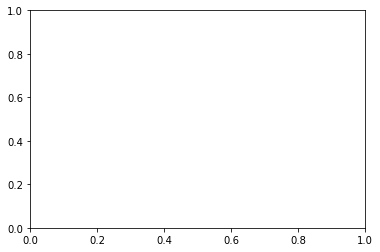

In [78]:

fent = fentynal2['2012 Fentanyl', '2013 Fentanyl',
 '2014 Fentanyl',
 '2015 Fentanyl ']

fig, ax = plt.subplots()
total_deaths = fentynal2.plot(kind='scatter', x=fent, y='Fentynal', cmap='RdYlGn', ax=ax)



